In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Understanding the problem
"""
We're going to code Linear Regression from scratch with numpy and pure math via `Python`. We gon draw via `matplotlib`

Details:
Linear Regression is the way to model the realtionship between dependent(y aka prediction) and independet(x aka input)
house_sizes = [1000, 1200, 1400, 1600]  # These are x values
house_prices = [150, 180, 210, 240]     # These are y values

We can use `house_sizes` in order to predict `house_prices`:
  After training(our model) we can come up with a solution like below:
  Price= 0.1 * Size + 50 ---> 0.1*100 = 100 + 50 = 150(house_prices[0])
  So `y` = 0.1 * x + 50
  `m` here is our slope(aka weight) which means how line aligns when we play with `x` via `m`. Weight controls how the line changes it's `direction and steepness`  without changing it is starting point(aka b)
  `b` points the value of `y(aka predictions)` when `x`(aka input is 0) also knows as the starting point of our `line`.It either can be origin or down through the `y` axis or up through the `y` axis.

 Important:
 If your intercept `b` is in the bad location(aka has bad value/prediction) then it does not matter how good is your slope `m`. Because even though you play with `m` it you will not be able to
 find the best fit because `data points(aka (x,y))` might be in center meanwhile your `b` is placed on `y` axis point 3. Best fit wont be possible. So  you have to move your `b` to the starting point center(aka origin)

 Example use case of bad `b`:
 # Let's say our data looks like this:
 x = [1, 2, 3, 4, 5]
 y = [101, 103, 105, 107, 109]  # Data clusters around y = 100 - 110

 BAD: Wrong value of `b`
 if b = 3 then y = mx + 3
 even with perfect slope `m`= 2 , y = 2x + 3
 Predictions: [5, 7, 9, 11, 13] - WAY off from actual [101, 103, 105, 107, 109]

 Good: Correct value of `b`
 # GOOD: Correct b value
 # If b = 99, then: y = 2*x + 99
 # Predictions: [101, 103, 105, 107, 109] - Perfect fit!

 Important:
 The best `b` depends on the best `m`. Becuase according to the directio/steepness of `m`,  `b` resizes itself to go either up or down

 For animational info - https://bharathikannann.github.io/blogs/a-visual-intro-to-linear-regression-math/
"""

"""
Steps to take in order to tackle the problem.

| Step | Title                         | Purpose                                      |
| ---- | ----------------------------- | -------------------------------------------- |
| 1    | Define Dataset (x, y)         | Set your input and target values             |
| 2    | Initialize Parameters (w, b)  | Randomly or zero-init the slope & intercept  |
| 3    | Predict `y_hat = wx + b`      | Linear prediction formula                    |
| 4    | Compute Loss (MSE)            | Measure how bad predictions are              |
| 5    | Compute Gradients (dw, db)    | Find how to update w, b to reduce error      |
| 6    | Update Parameters             | Apply gradient descent using learning rate   |
| 7    | Train for N Epochs            | Loop steps 3 → 6 until convergence           |
| 8    | Final Evaluation / Plot (opt) | Check how well the final model fits the data |


"""

'\nSteps to take in order to tackle the problem.\n\n| Step | Title                         | Purpose                                      |\n| ---- | ----------------------------- | -------------------------------------------- |\n| 1    | Define Dataset (x, y)         | Set your input and target values             |\n| 2    | Initialize Parameters (w, b)  | Randomly or zero-init the slope & intercept  |\n| 3    | Predict `y_hat = wx + b`      | Linear prediction formula                    |\n| 4    | Compute Loss (MSE)            | Measure how bad predictions are              |\n| 5    | Compute Gradients (dw, db)    | Find how to update w, b to reduce error      |\n| 6    | Update Parameters             | Apply gradient descent using learning rate   |\n| 7    | Train for N Epochs            | Loop steps 3 → 6 until convergence           |\n| 8    | Final Evaluation / Plot (opt) | Check how well the final model fits the data |\n\n\n'

In [ ]:
# Step 1: Define our dataset - Set your input and target variables
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 9, 11])

"""
According to our dataset we can say that our perfect linear data is `y = 2x + 1` according to our formula `y = mx + b`. So our model should converge to m = 2, b =1. `x` is input, `y` is target.
at `y = 2x + 1` line will be perfect fit to the most of our data. This way we can nuemrically and visually can learn if our model is learning correctly.
"""

# Step 2: Initalize the parameters (w, b) - Randomly or zero-init the slope & intercept
m, b = 0, 0

# Step 3: Predict `y_hat = mx + b` - Linear prediction formula
def predict(m, x, b):
  y_hat = np.array([])
  for i in range(len(x)):
    y_hat = np.append(y_hat, m*x[i] + b)

  return y_hat

print(predict(5, x, 3))

# Step 4: Compute Loss (MSE) - Measure how bad predictions are. Lookup the formula for MSE before coming here
def compute_cost(y_hat, y):
  """
  Here we are comuting loss by subtracting original value that we wanna predict which is y and the predicted value which is y_hat. And then we square it. Why? Well, let's have a look below.
  1.When we square our error we get it bigger. Actually we are massaging/preparing our error to be destroyed by Gradient Descent(we gon hav a lookat it soon). Gradient Descent always punishes big erros first and more
  2.Squaring helps us to eliminate negative values. Imagine your y_hat - y is -5 and at next step y_hat - y is 5. And? when you will add them together(according to formula) they will eat eachother(-5 + 5 = 0). So you lose prediction
  3.Big errors gets punished more

  Note: We're going to use this function in order to measure how well our model performs at the end. Each time Gradient Descent updates `w` and `b` we're going to call this function in order to see the error.
  The less error is the better model performs.
  """
  # loss = np.square(y_hat - y)/len(y)
  loss = np.square(np.subtract(y_hat, y)).mean() # Let's say 139.0 is our mean(aka average) error. But in order ot find true error we gotta sqrt(loss) so we will get 11.8. This means on average, your predictions are about 11.8 units away from the true values
  return loss

print(compute_cost(predict(5 , x, 3), y))

# Compute gradients (dw, db) - Find how to update w and b to reduce error(between y_hat and y)
# dw - derivative of w or w.t.r(with respect to) w
# db - derivative of b or w.t.r(with respect to) b

def compute_gradients(x, y, y_hat):
  """
  We have to use Gradient Descent Mathematical Derivative formula in order to take derivative of `m` and `b` with respect to `loss`(the lost that gradient descent formula has by default inside there). It is not the same loss we get form `compute_cost function`
  Derivative means `slope`. Slope is the shape of the line we get by playing with `m`.Check the animation link above to play with `m` and `b`.Despite `b` also has affect when it comes to line , we use `m` to define slope. Why? look below

  Why `m` defines `slope` despite `b` is also moving line up and down through `y` axis?
  1. When we talk about `slope` we care about steepness(aka where line is tilting). Steepness represents the rate of change. Derivatice is all about `change`.
  The steeper the `slope` is the faster is the rate of change
  The less stepper/flatter the `slope` is the slower is the rate of change
  This relationship helps to understand how output changes when we change the input. Because input is x and output is y so the linewe gon draw via (x,y) has steepness

  We are going to take derivative of `m` and `b` with respect to `loss`. We're going to use partial derivative

  """
  n = len(x)
  dw = (2/n) * np.dot(np.subtract(y_hat, y), x)
  db = (2/n) * np.sum(np.subtract(y_hat, y))

  """
  What we have just done is a magic where two variables `m` and `b` taking their parts to draw the perfect line that fits the data. How? Look below
  When we do `dw` with `gradient descent` we actually tell to our model to compute the `slope` while ignoring `b(aka intercept)`. Because in order to draw the best intercept `b` we have find the best slope.
  So our model be like okay we took partial derivative w.t.r to `m` which means ignore the `b(aka intercept and either go down or up on the y axis)` because we only care about `steepness` currently

  Once we done with `dw` we get to `db`

  Our models says okay i found `w` via `dw` so let's draw intercept `b`(aka move up or down through y axis to help  the slope to fit the data) therefore move our line up or down on the `y` axis to find the best fit.
  And for each `w` and `b` we keep calling the `compute_cost` in order to understand how many times `dw` and `db` changed `w` and `b` changed.
  """
  return dw, db

print(compute_gradients(x, y, predict(5, x, 3)))

"""
Important NOTE about `compute_gradient` and what it's result means:
This is the result we got from `compute_gradient` function - (np.float64(78.0), np.float64(22.0))

78.0 for `dw` - `w`
22.0 for `db` - `b`

It says - If you move `w` slightly the cost will go up a lot by `78 * by that change`
It also says - If you move `b` slightly the cost will go up a lot by `22 * by that change`

This huge cost. It means you are not walking you are jumping down the road. You may miss your target. You have to take small steps instead of jumping in order to avoid important miss
`miss` here referring to finding the best `w` and `b`. Huge cost(such as 78 and 22) means you are not checking points but you are counting on luck by checking the random points.
You may jump over of your  `best fit` line coordinates.
And that's why we introduce using something called `learning_rate`

`learning_rate` just multiplying your cost gradient with decimal point number and gets it smaller sometimes under `1`.Which tells to your model to take smaller steps down the road so you wont miss any improtant points

Typical `learning rate` values to try:

learning_rate = 0.01    # Most common starting point
learning_rate = 0.001   # Conservative (slower but safer)
learning_rate = 0.1     # Aggressive (faster but riskier)
learning_rate = 0.0001  # Very conservative
"""

# Update parameters - Apply gradient descent using learning rate

def update_parameters(m, b, dw, db, learning_rate):
  m = m - learning_rate * dw
  b = b - learning_rate * db

  return m, b


print(update_parameters(m, b, *compute_gradients(x, y, predict(5, x, 3)),0.01))


# Train for N epochs
def train(x, y, epochs, learning_rate):
  """
  We need to now join all those functions we wrote in a loop in order ot keep training our model until it converges.
  Steps:
  Predict ---> compute loss ---> compute gradients ---> update parameters

  Details:
  Let's train Linear Regression model with gradient descent
  - x: input features (array)
  - y: target values (array)

  - epochs: number of training iterations
  - learning_rate: step size for gradient descent in order to go down the road carefully

  Returns:
  trained parameters for (m and b)
  cost history for plotting later


  """

  # Initialize parameters
  m, b = 0, 0
  cost_history = [] # for storing costs to plot how it has changed while training
  print("Start training.....")
  print("Target: y= 2x + 1")
  print(f"Initial parameters: m = {m}, b = {b}")
  print("-" * 50)

  # Let's start looping
  for epoch in range(epochs):

    # Predict here
    y_hat = predict(m, x, b)

    # Compute and add cost here
    cost = compute_cost(y_hat, y)
    cost_history.append(cost)

    # Compute gradients
    dw, db = compute_gradients(x, y, y_hat)

    # Update parameters
    m, b = update_parameters(m, b, dw, db, learning_rate)

    # Print progress for every 100 epochs
    if epoch % 100 == 0:
      print(f"Epoch {epoch}, Cost = {cost:8.4f}, m = {m:6.3f}, b = {b:6.3f}")


  print("-"*50)
  print("Training completed!")
  print(f"Final parameters: m={m:.3f}, b={b:.3f}")
  print(f"Final cost: {cost_history[-1]:.6f}")
  print("Target was m =2, b = 1")

  return m, b, cost_history


# Train the model
final_m, final_b, cost_history = train(x, y, epochs=1000, learning_rate = 0.01)

# Test the final model
print("\nTesting final model:")
final_predictions = predict(final_m, x, final_b)
print(f"Predictions: {final_predictions}")
print(f"Actual:      {y}")
print(f"Difference:  {final_predictions - y}")

[ 8. 13. 18. 23. 28.]
139.0
(np.float64(78.0), np.float64(22.0))
(np.float64(-0.78), np.float64(-0.22))
Start training.....
Target: y= 2x + 1
Initial parameters: m = 0, b = 0
--------------------------------------------------
Epoch 0, Cost =  57.0000, m =  0.500, b =  0.140
Epoch 100, Cost =   0.0159, m =  2.082, b =  0.706
Epoch 200, Cost =   0.0081, m =  2.058, b =  0.790
Epoch 300, Cost =   0.0041, m =  2.041, b =  0.851
Epoch 400, Cost =   0.0021, m =  2.030, b =  0.893
Epoch 500, Cost =   0.0011, m =  2.021, b =  0.924
Epoch 600, Cost =   0.0005, m =  2.015, b =  0.946
Epoch 700, Cost =   0.0003, m =  2.011, b =  0.961
Epoch 800, Cost =   0.0001, m =  2.008, b =  0.973
Epoch 900, Cost =   0.0001, m =  2.005, b =  0.980
--------------------------------------------------
Training completed!
Final parameters: m=2.004, b=0.986
Final cost: 0.000036
Target was m =2, b = 1

Testing final model:
Predictions: [ 2.98987045  4.99375103  6.99763161  9.0015122  11.00539278]
Actual:      [ 3  5

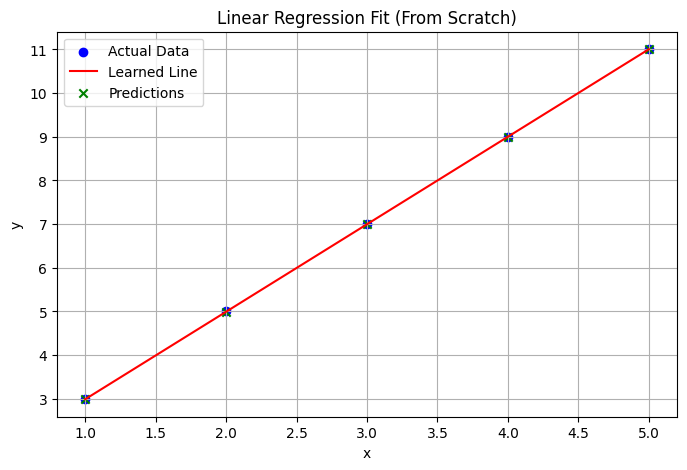

In [ ]:
# Plott the line
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Data')             # True data points
plt.plot(x, final_predictions, color='red', label='Learned Line')            # Predicted line
plt.scatter(x, final_predictions, color='green', marker='x', label='Predictions')  # Predicted dots

# Labels and legend
plt.title("Linear Regression Fit (From Scratch)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Alright cool, now let's try to code Linear Regression with multi-feature support.

"""
GOAL and DESCRIPTION:

Goal - is to LEVEL UP our existing Linear Regression model from single-feature to multi-feature and predict house prices based on 3(newly added) features

Description:

Now we are going to be more real and use our Linear Regression model on real world case.We are going to level up our model.
First we going to create new `X` and add houses with 3 features and then we are going to have
`y` for the actual prices.

We are going to modify some functions, therefore  I've decided to code in new column.

Step 1: - Explain the change we going to do and apply it.
"""

# Step 1 - goes here:

# Things to do - Upgrade `X` and `y` with house features and prices.
X = np.array([
    [1000, 2, 10], # House 1: 1000 sqrft, 2 bedrooms, 10 years
    [1200, 3, 5],  # House 2: 1200 sqrft, 3 bedrooms, 5 years
    [1400, 2, 20], # House 3: 1400 sqrft, 2 bedrooms, 20 years
    [1600, 4, 2]   # House 4: 1600 sqrft, 4 bedrooms, 2 years
])

# Let's also define our vector(aka array or list) with the actual prices
y = np.array([220, 280, 260, 366]) # Exact house prices for each house. We gotta predict closer to these values

"""
Each ROW = One house (one sample)
Each COLUMN = One feature

Column 0: Size (1000, 1200, 1400, 1600)
Column 1: Bedrooms (2, 3, 2, 4)
Column 2: Age (10, 5, 20, 2)

So X[0] = [1000, 2, 10] = "House 1 has 1000 sqft, 2 bedrooms, 10 years old"
and etc...

"""

print(X)
print("-"*50)
print(y)

# Explaining why this breaks our existing model

"""
Well buddy, eyes up here bcz a litte too broad one goes here. HEADS UP

Out current `predict` function performs witht he `equation` called y = wx + b.(w and m are the same thing. so let's say w)
Heads Up!!! - we have only on `w` there. So? `w` stands for `weight` which means `w` always lets our model to know how much the feature is important. in existing mode we have only one featrure. Look below

existing `x` - x = np.array([1, 2, 3, 4, 5]). let's say numbers in our `x` are the bedrooms. So? We are just given 1 feature and it is `bedroom` and we are asked to predict only on that? Bullshit...
Since we have only one `feature` which is `bedroom` inherently we only need one `w(aka weight)` in order to explain to our model how much is that one feature `bedroom` is important. You get it? Each time
we're going to take on number(bedroom count) from our existing `x` and multiply it with the `w(aka weight)` in order to point out the importance of them - `w*x[i] + b`

So where the FUCK is problem here?

Problem is in our modified `X`. Becasue we dont have only bedrooms but also sqrft and yearsss. in total `sqrft, bedrooms, year`. You know what does it mean? It means that we gotta have 3 different `w` variables.
Why? because each of those features(sqrft, bedrooms, year) are their own importance level. How? Look below

Older hosue may decrease the price
More bedrooms ends up with high price
High sqrft means higher area so higher price.

Now you getting it? - Imagine you have only one  `w` and you tryna to point out the importance of all those 3 features with only one variable.WTF is that? So they all gonna have the same importance level?
BULLSHITTTTT HAHAHAHA
"""

# let's declare our weights now: we are going to creat a list of weights with the length of features which is 3.
# w = np.array([0, 0, 0]) # why zeros? Remember that in the beginning our model is dump. It doesnt know anything. It needs to learn. So it is going to learn and update those values in `w` to adjust weights properly

# even better apperoach is to actually take the size of features from `X` itself and create array of `w`
w = np.zeros(X.shape[1]) # shape[0] going to return the count of rows whichis 4 but shape[1] going to return the count of columns which is 3.
b = 0
"""
For better intuition:
w = [w1, w2, w3] Where:
w1 - how much size affects price
w2 - how much bedrooms affect price
w3 - how much age affects price

therefore, Our predictions become:
y_hat = w1*size + w2*bedrooms+  w3*age + b or in vector form - y_hat = np.dot(w, X[i] + b) # Doc product


Magic of DOT product:

for e.g:  w = [0.1, 50, -2] # weights
X[0] = [1000, 2, 10] # house 1 with features

np.dot(w, X[0]) = 0.1*1000 + 50*2 + (-2)*10 =
                = 100 + 100 - 20

This says, size adds 100$, bedrooms add 100$, age subtracts 20

So, our model now can learn that:

Your model can now learn that:

Bigger houses cost more (w1 > 0)
More bedrooms cost more (w2 > 0)
Older houses cost less (w3 < 0)

Good job isn't it?

"""

# Step 2: Changing the predict function so it can support multi-features

# our old predict function supports single feature
"""
def predict(m, X, b):
  return m*X + b
"""

# Updated function
def predict_with_multi_features(w, X, b):
  return np.dot(X, w) + b

[[1000    2   10]
 [1200    3    5]
 [1400    2   20]
 [1600    4    2]]
--------------------------------------------------
[220 280 260 366]


In [ ]:
predictions = predict_with_multi_features(w, X, b)
predictions

"""
Perfect now our multi-feature function works. If you wanna see that if it predicts `y` correctly then just grab following things and plug in the function above and run.

Things to check:

# Note - these are the perfect numbers where I found mathematically. So our model gotta find the same. but not now. Im giving you those so you can unerstand our function. However,
our model goig to find those `weights` and `bias` after multiple times of iterations.

w = np.array([0.15, 20, -2])  # weights
b = 50  # bias
"""

'\nPerfect now our multi-feature function works. If you wanna see that if it predicts `y` correctly then just grab following things and plug in the function above and run.\n\nThings to check:\n\n# Note - these are the perfect numbers where I found mathematically. So our model gotta find the same. but not now. Im giving you those so you can unerstand our function. However,\nour model goig to find those `weights` and `bias` after multiple times of iterations.\n\nw = np.array([0.15, 20, -2])  # weights\nb = 50  # bias\n'

In [ ]:
# compute_cost function going to stay same becasue it takes y and y_prediciton as argument and calcs the difference in order to find the error(distance). So it works perfectly well

In [ ]:
# compute_gradient modified goes here:

# Let's have a quick glimpse to our existing func

"""
def compute_gradients(x, y, y_hat):
    n = len(x)
    dw = (2/n) * np.dot(np.subtract(y_hat, y), x)  # Single feature
    db = (2/n) * np.sum(np.subtract(y_hat, y))
    return dw, db

"""

"""
So, here we are using our existing 1D `w` in order to calcualte the gradients.What is gradient again? Gradient is just a number you get after taking derivative loss((y-y_hat)^2).
When u subtract that number from the `weight` it reduces the error.

Now, we have modified and upgraded `predict` fucntion that works with multiple features. So ? we no longer can rely on our existin'  `compute_gradient` method.

We have to modify it so it's going to be able to calc the error and compute gradient for  2D `X`.
"""

# Implementaiton:

# `x` becomes `X` and `dw` calcualtion going to change completely

def compute_gradients_for_multiple_features(X, y, y_hat):
  n = len(x) # number of samples
  # let's keep `np.subtract(y_hat, y)` in a variable instead of hardcoding
  error = np.subtract(y_hat, y)
  dw = (2/n)*np.dot(X.T, error) # I'll explain this aprt because it is dead important. It is the reason why we update this func. Find the explanation with code `Transpose`.
  db = (2/n)*np.sum(error) # we controlling the line through the `y` axis.

  return dw, db



# Transpose:

"""
Well, the reason I'm using `X.T` is that i wanna actually swap rows with columns aka houses with features. Look below. I run some codes there.
in the bgeinning X is like first row [1000, 2, 10] is `house 1`. one house and all it's features. That's a problem. Becasue when we calculated the `error` in our `compute_gradients_for_multiple_features` function,
we have to SUBTRACT it from our features but we ahev to put all same features together first.

Such as below:
sqrft - [1000, 1200, 1400, 1600] here we can multiply each sqrft with error and add them all toegether and get a value `N`. N means how much error gonna change if you change `w` tiny bit.
bedrooms - [2, 3, 2, 4] # same here
ages - [10, 5, 20, 2] # same here

So, In order to make our X to look like above we use `X.T`.It is numpy and Linear Algebra  practice.Please go and do some practice in numpy and make sure you understand math behind it.


SUM IT UP BELOW:

What np.dot(X.T, error) Does:
Let's say your errors are: error = [10, -5, 8, -3]

pythonnp.dot(X.T, error) = np.dot([
    [1000, 1200, 1400, 1600],  # Size row
    [2, 3, 2, 4],              # Bedroom row
    [10, 5, 20, 2]             # Age row
], [10, -5, 8, -3])# errors

# This gives:
# dw[0] = 1000×10 + 1200×(-5) + 1400×8 + 1600×(-3) = gradient for size weight
# dw[1] = 2×10 + 3×(-5) + 2×8 + 4×(-3) = gradient for bedroom weight
# dw[2] = 10×10 + 5×(-5) + 20×8 + 2×(-3) = gradient for age weight
This tells you:

How much to change the size weight
How much to change the bedroom weight
How much to change the age weight
"""

# Now let's update update_parameters function

def update_parameters_multi_features(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw  # w is now array, dw is array
    b = b - learning_rate * db  # b is still scalar
    return w, b

In [ ]:
X

array([[1000,    2,   10],
       [1200,    3,    5],
       [1400,    2,   20],
       [1600,    4,    2]])

In [ ]:
X.shape

(4, 3)

In [ ]:
X.T

array([[1000, 1200, 1400, 1600],
       [   2,    3,    2,    4],
       [  10,    5,   20,    2]])

In [ ]:
# --- SCALE X and y ---
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y_scaled = (y - y_mean) / y_std

# --- INIT weights ---
w = np.zeros(X.shape[1])
b = 0
learning_rate = 0.01
epochs = 1000

# --- TRAINING LOOP ---
print("Start training...")
print(f"Initial weights: {w}, b = {b}")
print("-" * 50)

for epoch in range(epochs):
    # y_hat = np.dot(X_scaled, w) + b
    y_hat = predict_with_multi_features(w, X_scaled, b)
    #cost = np.mean((y_scaled - y_hat) ** 2)
    cost = compute_cost((y_hat - y_scaled),y_scaled)
    dw = (2 / len(y_scaled)) * np.dot(X_scaled.T, (y_hat - y_scaled))
    db = (2 / len(y_scaled)) * np.sum(y_hat - y_scaled)

    dw, db = compute_gradients_for_multiple_features(X_scaled, y_scaled, y_hat)

    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}: Cost = {cost:.4f}, w = {w}, b = {b:.4f}")

print("-" * 50)
print("Training completed!")

# --- UNSCALE predictions for real-world output ---
y_pred_scaled = np.dot(X_scaled, w) + b
y_pred = y_pred_scaled * y_std + y_mean

print("\nTesting final model:")
print("Predictions:", np.round(y_pred, 2))
print("Targets:    ", y)
print("Difference: ", np.round(y_pred - y, 2))


Start training...
Initial weights: [0. 0. 0.], b = 0
--------------------------------------------------
Epoch 0: Cost = 4.0000, w = [ 0.01401447  0.01514481 -0.00969374], b = 0.0000
Epoch 100: Cost = 1.1062, w = [ 0.48711794  0.4251818  -0.20180018], b = 0.0000
Epoch 200: Cost = 1.0133, w = [ 0.54224996  0.43584271 -0.17524399], b = 0.0000
Epoch 300: Cost = 1.0030, w = [ 0.55433436  0.43542013 -0.16647035], b = 0.0000
Epoch 400: Cost = 1.0009, w = [ 0.55747862  0.43494329 -0.16440218], b = 0.0000
Epoch 500: Cost = 1.0003, w = [ 0.55842887  0.4345373  -0.16409032], b = 0.0000
Epoch 600: Cost = 1.0002, w = [ 0.55882784  0.43415258 -0.16422223], b = 0.0000
Epoch 700: Cost = 1.0002, w = [ 0.55908752  0.43377416 -0.16446534], b = 0.0000
Epoch 800: Cost = 1.0002, w = [ 0.55931163  0.43339819 -0.16473581], b = 0.0000
Epoch 900: Cost = 1.0002, w = [ 0.55952631  0.43302369 -0.16501253], b = 0.0000
Epoch 999: Cost = 1.0002, w = [ 0.55973601  0.43265415 -0.16528742], b = 0.0000
------------------